# Installation of required libraries and basic setup

In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

# Testing the dataset 

In [3]:
import os
os.chdir(r'/kaggle/input/landslide4sense-data')

In [4]:
# Testing the dataset 
path_single = r"/kaggle/input/landslide4sense-data/TrainData/TrainData/img/image_1000.h5"
path_single_mask = r'/kaggle/input/landslide4sense-data/TrainData/TrainData/mask/mask_1000.h5'

ls ['img']
input data shape: (128, 128, 14)
data ndvi shape  (128, 128) f_data shape:  (1, 128, 128, 3)


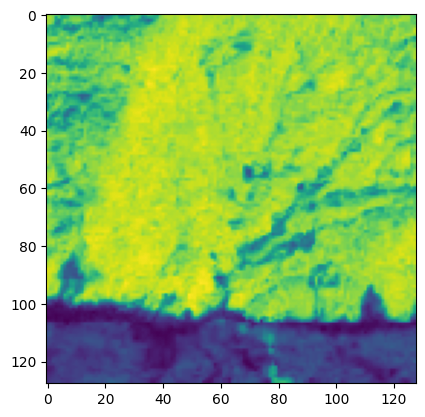

In [5]:
f_data = np.zeros((1, 128,128, 3))
with h5py.File(path_single) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)
    plt.imshow(data[:, :, 3:0:-1])
    
    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]
    data_rgb = data[:, :, 3:0:-1]
    data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
    f_data[0, :, :, 0] =data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]

    print("data ndvi shape ", data_ndvi.shape, "f_data shape: ", f_data.shape)
    plt.imshow(data_ndvi)

ls ['mask']
input data shape: (128, 128)


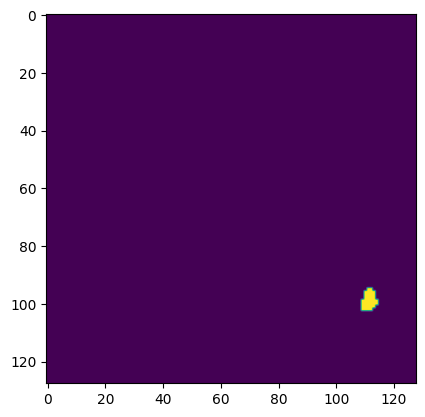

In [6]:
with h5py.File(path_single_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

In [7]:
path_single = r"/kaggle/input/landslide4sense-data/TrainData/TrainData/img/image_10.h5"
path_single_mask = r'/kaggle/input/landslide4sense-data/TrainData/TrainData/mask/mask_1.h5'
TRAIN_PATH = r"/kaggle/input/landslide4sense-data/TrainData/TrainData/img/*.h5"
TRAIN_MASK = r'/kaggle/input/landslide4sense-data/TrainData/TrainData/mask/*.h5'

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

In [8]:
#testing for GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [9]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TRAIN_XX[i, :, :, 3] = data_ndvi #NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION
    
    
    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data
    

0 /kaggle/input/landslide4sense-data/TrainData/TrainData/img/image_1.h5 /kaggle/input/landslide4sense-data/TrainData/TrainData/mask/mask_1.h5
1 /kaggle/input/landslide4sense-data/TrainData/TrainData/img/image_10.h5 /kaggle/input/landslide4sense-data/TrainData/TrainData/mask/mask_10.h5
2 /kaggle/input/landslide4sense-data/TrainData/TrainData/img/image_100.h5 /kaggle/input/landslide4sense-data/TrainData/TrainData/mask/mask_100.h5
3 /kaggle/input/landslide4sense-data/TrainData/TrainData/img/image_1000.h5 /kaggle/input/landslide4sense-data/TrainData/TrainData/mask/mask_1000.h5
4 /kaggle/input/landslide4sense-data/TrainData/TrainData/img/image_1001.h5 /kaggle/input/landslide4sense-data/TrainData/TrainData/mask/mask_1001.h5
5 /kaggle/input/landslide4sense-data/TrainData/TrainData/img/image_1002.h5 /kaggle/input/landslide4sense-data/TrainData/TrainData/mask/mask_1002.h5
6 /kaggle/input/landslide4sense-data/TrainData/TrainData/img/image_1003.h5 /kaggle/input/landslide4sense-data/TrainData/Trai

/tmp/ipykernel_30/3444182847.py:25: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE


1670 /kaggle/input/landslide4sense-data/TrainData/TrainData/img/image_2501.h5 /kaggle/input/landslide4sense-data/TrainData/TrainData/mask/mask_2501.h5
1671 /kaggle/input/landslide4sense-data/TrainData/TrainData/img/image_2502.h5 /kaggle/input/landslide4sense-data/TrainData/TrainData/mask/mask_2502.h5
1672 /kaggle/input/landslide4sense-data/TrainData/TrainData/img/image_2503.h5 /kaggle/input/landslide4sense-data/TrainData/TrainData/mask/mask_2503.h5
1673 /kaggle/input/landslide4sense-data/TrainData/TrainData/img/image_2504.h5 /kaggle/input/landslide4sense-data/TrainData/TrainData/mask/mask_2504.h5
1674 /kaggle/input/landslide4sense-data/TrainData/TrainData/img/image_2505.h5 /kaggle/input/landslide4sense-data/TrainData/TrainData/mask/mask_2505.h5
1675 /kaggle/input/landslide4sense-data/TrainData/TrainData/img/image_2506.h5 /kaggle/input/landslide4sense-data/TrainData/TrainData/mask/mask_2506.h5
1676 /kaggle/input/landslide4sense-data/TrainData/TrainData/img/image_2507.h5 /kaggle/input/la

/tmp/ipykernel_30/3444182847.py:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2273 /kaggle/input/landslide4sense-data/TrainData/TrainData/img/image_3044.h5 /kaggle/input/landslide4sense-data/TrainData/TrainData/mask/mask_3044.h5
2274 /kaggle/input/landslide4sense-data/TrainData/TrainData/img/image_3045.h5 /kaggle/input/landslide4sense-data/TrainData/TrainData/mask/mask_3045.h5
2275 /kaggle/input/landslide4sense-data/TrainData/TrainData/img/image_3046.h5 /kaggle/input/landslide4sense-data/TrainData/TrainData/mask/mask_3046.h5
2276 /kaggle/input/landslide4sense-data/TrainData/TrainData/img/image_3047.h5 /kaggle/input/landslide4sense-data/TrainData/TrainData/mask/mask_3047.h5
2277 /kaggle/input/landslide4sense-data/TrainData/TrainData/img/image_3048.h5 /kaggle/input/landslide4sense-data/TrainData/TrainData/mask/mask_3048.h5
2278 /kaggle/input/landslide4sense-data/TrainData/TrainData/img/image_3049.h5 /kaggle/input/landslide4sense-data/TrainData/TrainData/mask/mask_3049.h5
2279 /kaggle/input/landslide4sense-data/TrainData/TrainData/img/image_305.h5 /kaggle/input/lan

## Testing min, max values in train data

In [10]:
# TRAIN_XX_n = TRAIN_XX / TRAIN_XX.max()
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


## Custom loss function (Dice Loss)

In [11]:
def dice_loss(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.math.sigmoid(y_pred)
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)

  return 1 - numerator / denominator

## Visualization of the training data

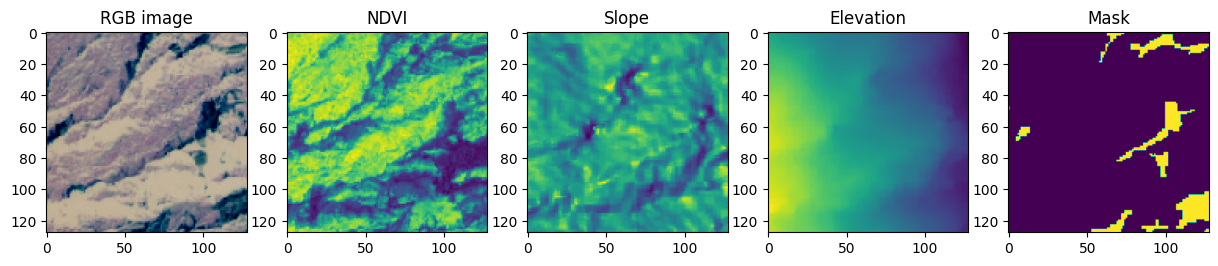

In [12]:
img=234
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

# Validation split

In [13]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.2, shuffle= True)

In [14]:
x_train.shape, y_train.shape

((3039, 128, 128, 6), (3039, 128, 128, 1))

In [15]:
# to release some memory, delete the unnecessary variable
del TRAIN_XX
del TRAIN_YY
del all_train
del all_mask 

# SegNet

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, BatchNormalization

# Define custom metrics
def recall_m(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

def segnet(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS):
    inputs = Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))

    # Encoder
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    p1 = MaxPooling2D((2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    p2 = MaxPooling2D((2, 2))(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    p3 = MaxPooling2D((2, 2))(x)

    # Decoder
    u3 = UpSampling2D((2, 2))(p3)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(u3)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)

    u2 = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(u2)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)

    u1 = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(u1)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)

    # Output
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(x)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])

    return model

# Usage
IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS = 128, 128, 6
model = segnet(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │             

 Total params: 2,887,873 (11.02 MB)

 Trainable params: 2,884,289 (11.00 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [17]:
# Change the file path to a writable directory
checkpointer = tf.keras.callbacks.ModelCheckpoint("/kaggle/working/best_SegNet_model.keras", monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")

callbacks = [
    checkpointer
]

history = model.fit(x_train, y_train, batch_size=16, 
                   epochs=25, 
                   verbose=2,
                   validation_data=(x_valid, y_valid),
                   callbacks=callbacks)

# Save the final model to a writable directory
model.save("/kaggle/working/SegNet_model_save.keras")

Epoch 1/25


I0000 00:00:1734477466.011221     103 service.cc:145] XLA service 0x7ee2980038a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734477466.011316     103 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1734477476.166166     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 1: val_f1_m improved from -inf to 0.03603, saving model to /kaggle/working/best_SegNet_model.keras
190/190 - 43s - 225ms/step - accuracy: 0.9479 - f1_m: 0.3822 - loss: 0.3349 - precision_m: 0.4521 - recall_m: 0.4814 - val_accuracy: 0.9751 - val_f1_m: 0.0360 - val_loss: 0.1067 - val_precision_m: 0.8342 - val_recall_m: 0.0188
Epoch 2/25

Epoch 2: val_f1_m did not improve from 0.03603
190/190 - 13s - 68ms/step - accuracy: 0.9820 - f1_m: 0.5047 - loss: 0.0714 - precision_m: 0.6790 - recall_m: 0.4553 - val_accuracy: 0.9747 - val_f1_m: 0.0024 - val_loss: 0.0932 - val_precision_m: 0.4583 - val_recall_m: 0.0012
Epoch 3/25

Epoch 3: val_f1_m improved from 0.03603 to 0.56639, saving model to /kaggle/working/best_SegNet_model.keras
190/190 - 13s - 70ms/step - accuracy: 0.9835 - f1_m: 0.5655 - loss: 0.0487 - precision_m: 0.7097 - recall_m: 0.5124 - val_accuracy: 0.9817 - val_f1_m: 0.5664 - val_loss: 0.0513 - val_precision_m: 0.6706 - val_recall_m: 0.4983
Epoch 4/25

Epoch 4: val_f1_m improv

In [18]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.03778339922428131 0.9846922755241394 0.6909093260765076 0.6897146105766296 0.6962161660194397


# Prediction

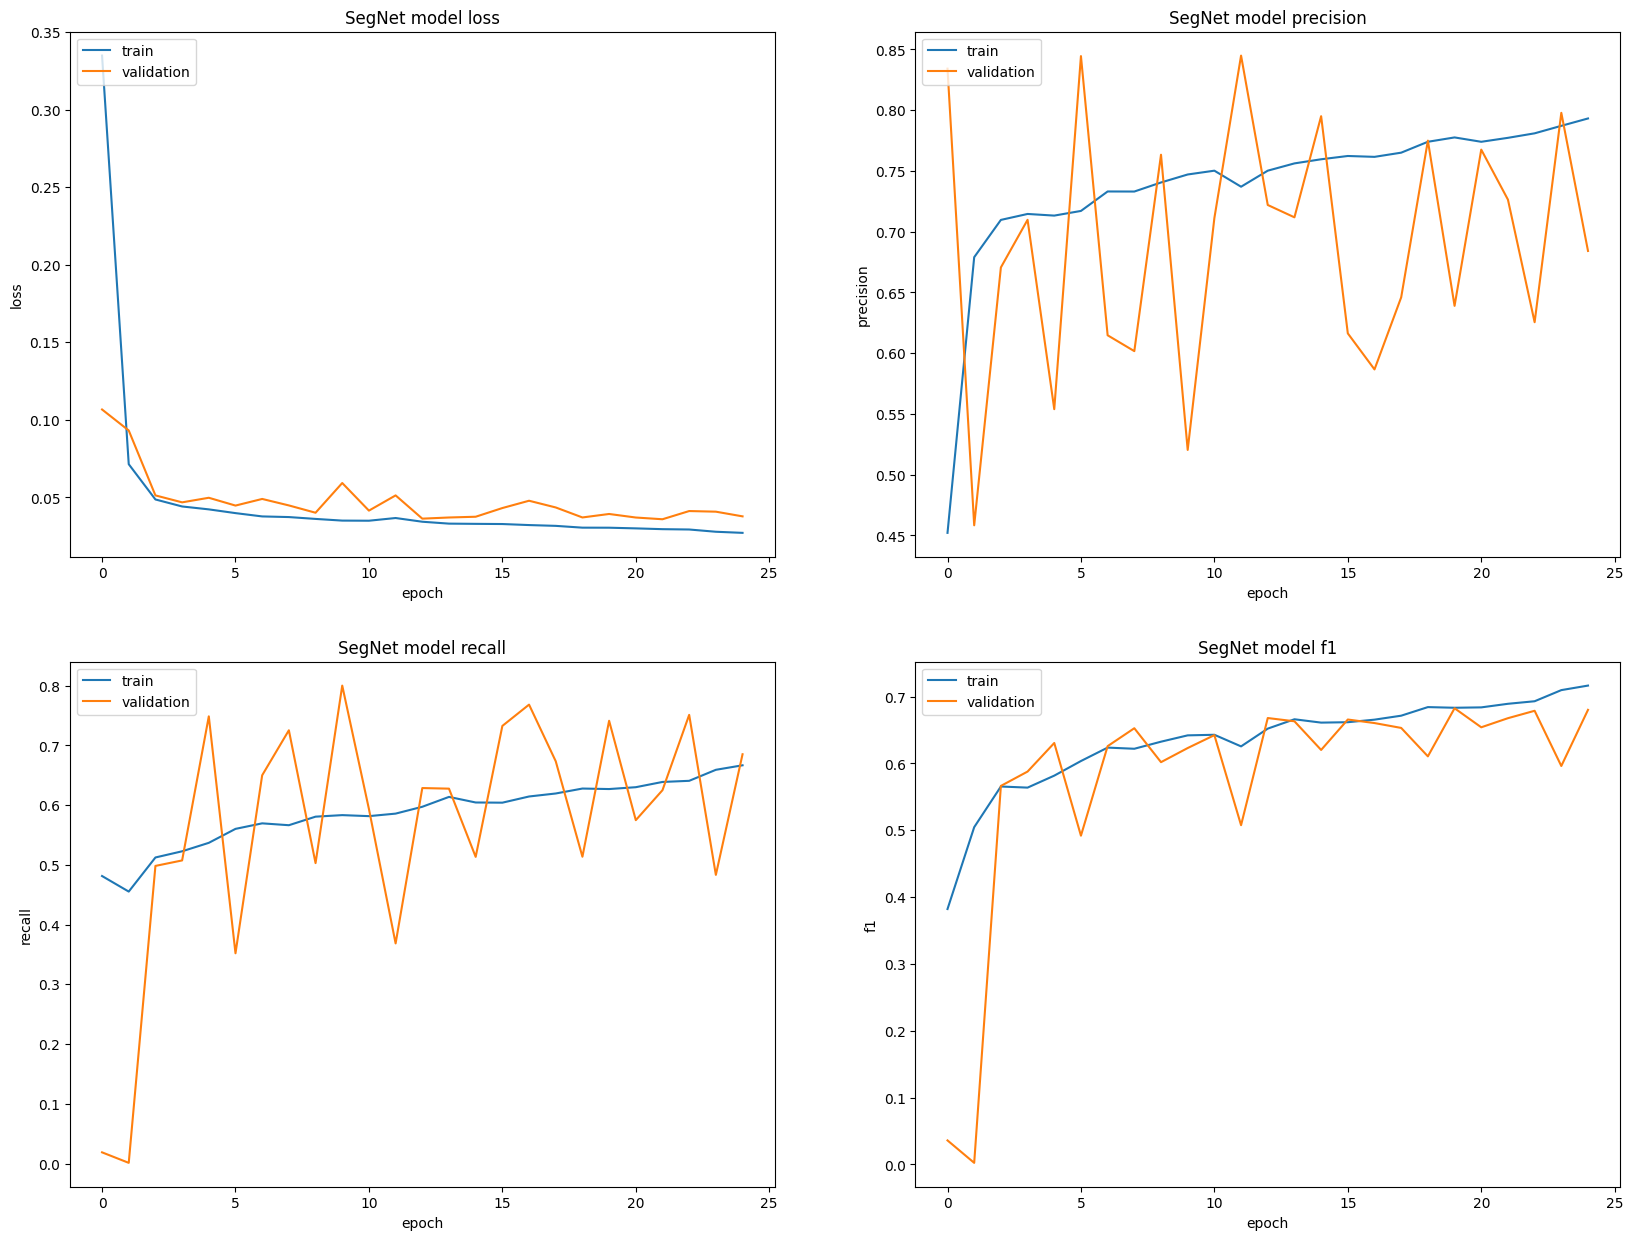

In [19]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('SegNet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('SegNet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('SegNet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('SegNet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

In [20]:
threshold = 0.6
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step


Text(0.5, 1.0, 'Training Image')

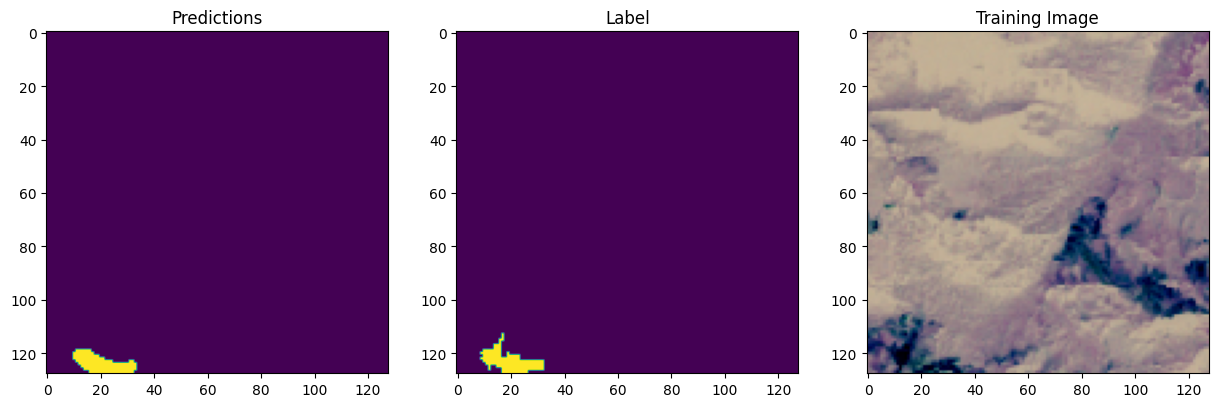

In [21]:
img = 180
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

Text(0.5, 1.0, 'Training Image')

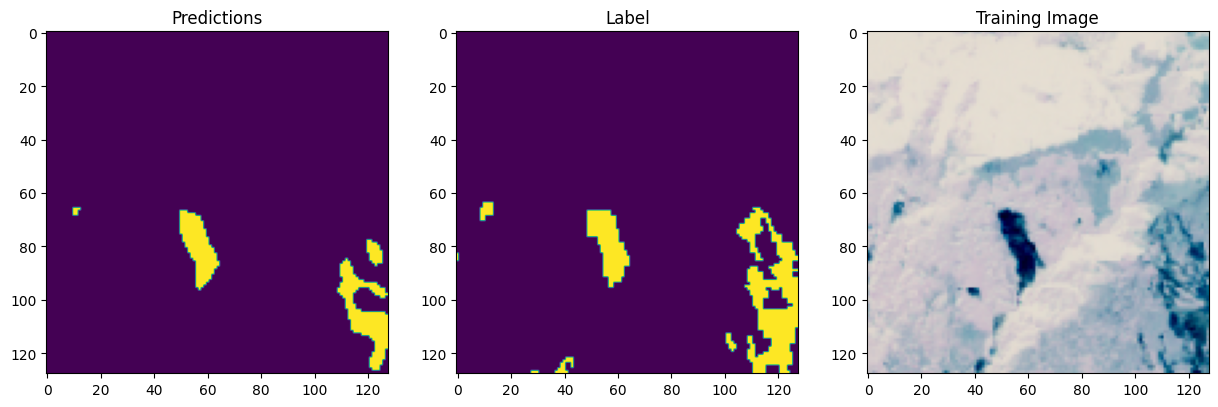

In [22]:
img = 270
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

Text(0.5, 1.0, 'Training Image')

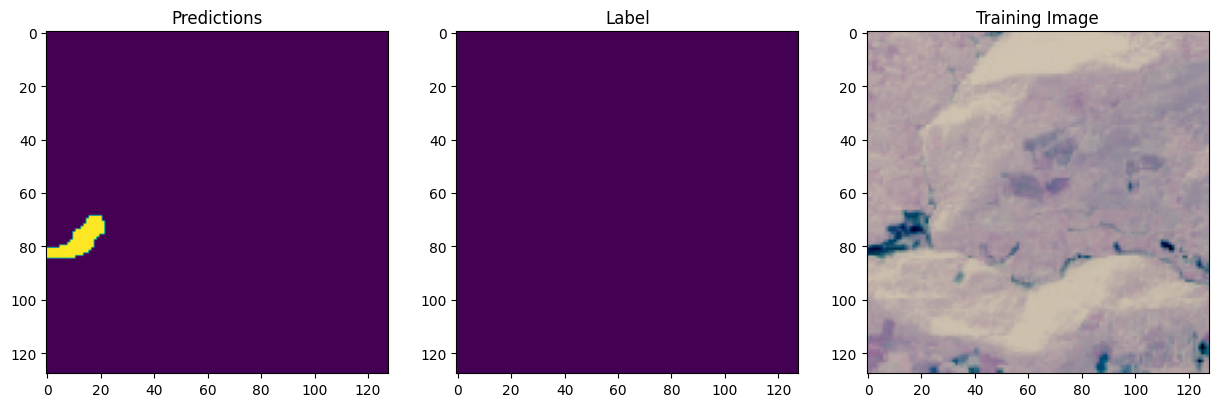

In [23]:
img = 500
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

# Validation

In [29]:
validation_url = r'/kaggle/input/landslide4sense-data/ValidData/ValidData/img/*.h5'
img_val = sorted(glob.glob(validation_url))

VAL_XX = np.zeros((245, 128, 128, 6))
mask_name = []
for i, img in enumerate(img_val):
    print(i, img)
    mask_name.append(img.split('/')[-1].replace('image', 'mask'))
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        VAL_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb #RED
        VAL_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        VAL_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        VAL_XX[i, :, :, 3] = data_ndvi #NDVI
        VAL_XX[i, :, :, 4] = 1- data[:, :, 13] / mid_slope #SLOPE
        VAL_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION

0 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_1.h5
1 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_10.h5
2 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_100.h5
3 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_101.h5
4 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_102.h5
5 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_103.h5
6 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_104.h5
7 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_105.h5
8 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_106.h5
9 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_107.h5
10 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_108.h5
11 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_109.h5
12 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_11.h5
13 /kaggle/input/landslide4sense-data/V

/tmp/ipykernel_30/2138996155.py:24: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


170 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_31.h5
171 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_32.h5
172 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_33.h5
173 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_34.h5
174 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_35.h5
175 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_36.h5
176 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_37.h5
177 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_38.h5
178 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_39.h5
179 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_4.h5
180 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_40.h5
181 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_41.h5
182 /kaggle/input/landslide4sense-data/ValidData/ValidData/img/image_42.h5
183 /kaggle/input/landslid

# Prediction for validation data

In [30]:
threshold = 0.5
pred_img = model.predict(VAL_XX)
pred_img = (pred_img > threshold).astype(np.uint8)
pred_img.shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 485ms/step


(245, 128, 128, 1)

Text(0.5, 1.0, 'Training Image')

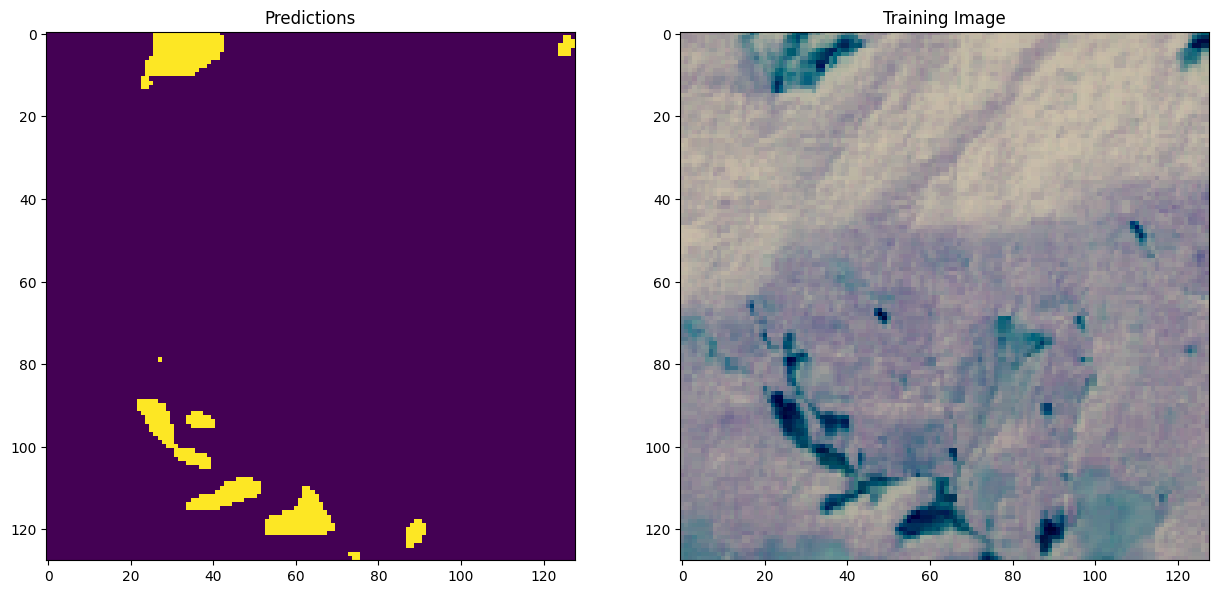

In [31]:
img = 167
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Training Image')

Text(0.5, 1.0, 'Training Image')

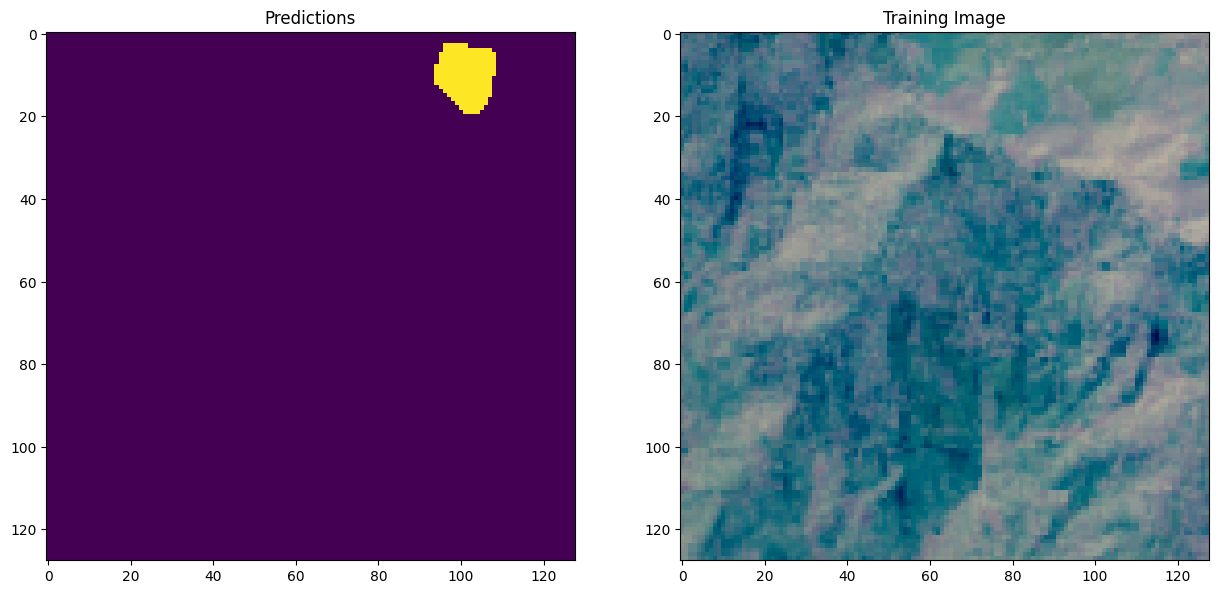

In [32]:
img = 120
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Training Image')

In [32]:
import os
import h5py

# Define the directory for saving masks in Kaggle
write_directory = '/kaggle/working/validation_masks/'

# Ensure the directory exists, create if not
os.makedirs(write_directory, exist_ok=True)

# Loop over masks and save them
for i, name in enumerate(mask_name):
    h5f = h5py.File(os.path.join(write_directory, name), 'w')
    
    # Adjust the dimension of the prediction to (n, 128, 128)
    pred_mask = pred_img[i, :, :, 0]
    
    # Write the mask to the directory
    h5f.create_dataset('mask', data=pred_mask)
    h5f.close()


# Tank You